Crop and Fertilizer Recommendation System Using Machine Learning

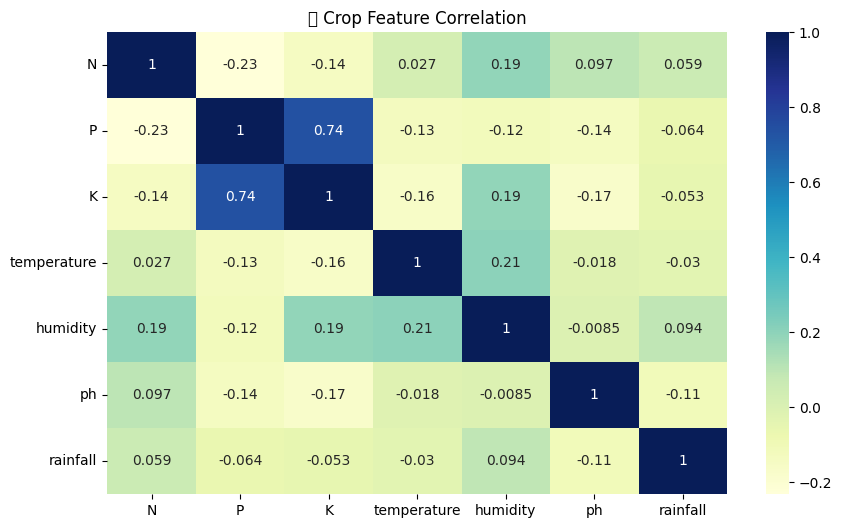

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")


crop_df = pd.read_csv('/content/Crop_recommendation.csv')
fert_df = pd.read_csv('/content/Fertilizer Prediction.csv')

# Correlation heatmap for crop data
plt.figure(figsize=(10, 6))
# Drop the 'label' column before calculating correlation
sns.heatmap(crop_df.drop('label', axis=1).corr(), annot=True, cmap='YlGnBu')
plt.title("🌾 Crop Feature Correlation")
plt.show()



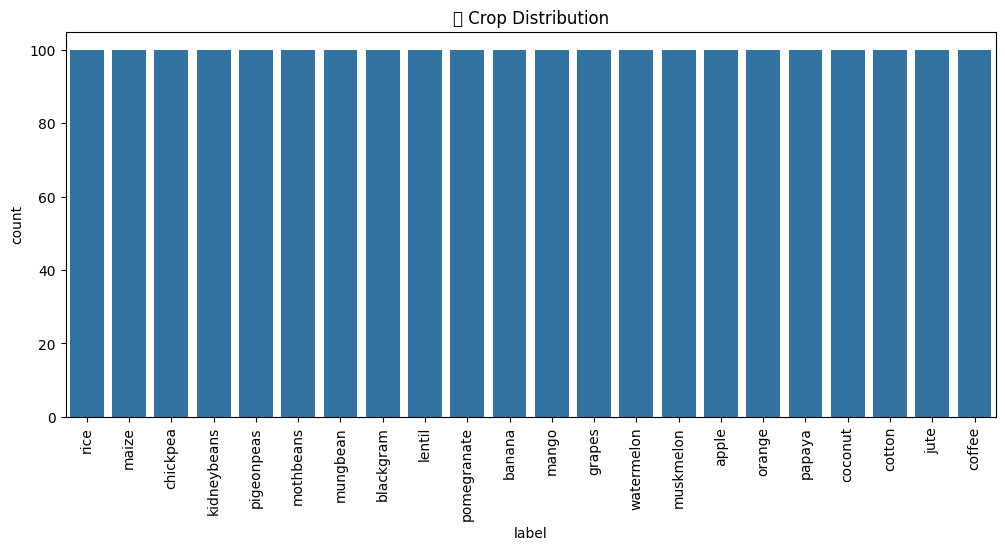

In [ ]:
# Crop distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=crop_df, x='label', order=crop_df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title(" Crop Distribution")
plt.show()

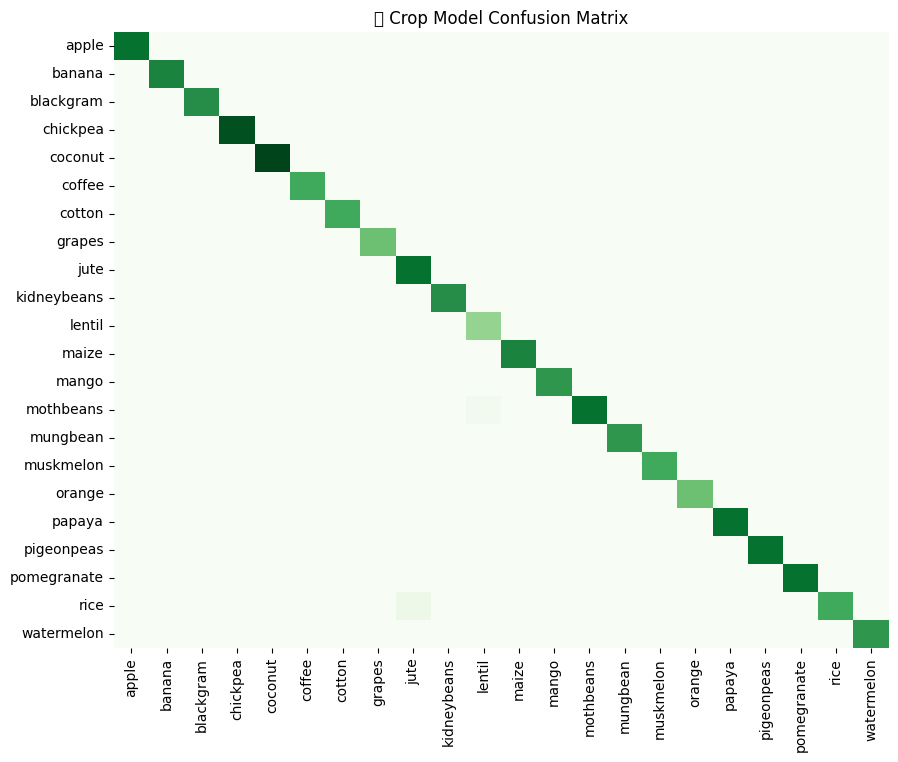

In [ ]:
# ---------------- Train Crop Model ----------------
X_crop = crop_df.drop('label', axis=1)
y_crop = crop_df['label']
X_crop_train, X_crop_test, y_crop_train, y_crop_test = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)

crop_model = RandomForestClassifier(n_estimators=200, random_state=42)
crop_model.fit(X_crop_train, y_crop_train)

#  Train Fertilizer Model
fert_encoded = fert_df.copy()
label_encoders = {}

for col in ['Fertilizer Name', 'Soil Type', 'Crop Type']:
    le = LabelEncoder()
    fert_encoded[col] = le.fit_transform(fert_df[col])
    label_encoders[col] = le

X_fert = fert_encoded.drop('Fertilizer Name', axis=1)
y_fert = fert_encoded['Fertilizer Name']
X_fert_train, X_fert_test, y_fert_train, y_fert_test = train_test_split(X_fert, y_fert, test_size=0.2, random_state=42)

fert_model = RandomForestClassifier(n_estimators=200, random_state=42)
fert_model.fit(X_fert_train, y_fert_train)

# Crop model
crop_preds = crop_model.predict(X_crop_test)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_crop_test, crop_preds), cmap="Greens", xticklabels=crop_model.classes_, yticklabels=crop_model.classes_, cbar=False)
plt.xticks(rotation=90)
plt.title("🌿 Crop Model Confusion Matrix")
plt.show()

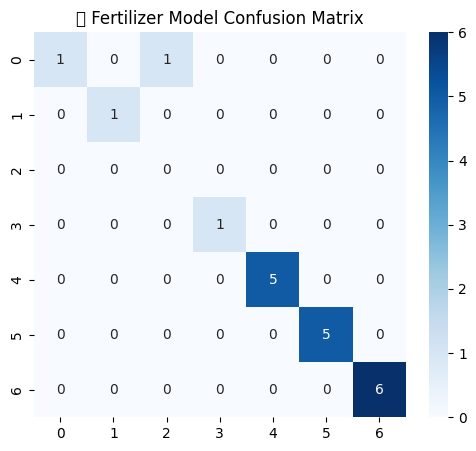

In [ ]:
# Fertilizer model
fert_preds = fert_model.predict(X_fert_test)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_fert_test, fert_preds), annot=True, cmap="Blues")
plt.title(" Fertilizer Model Confusion Matrix")
plt.show()

In [ ]:
#  Interactive Recommendation System
def recommend_system():
    print("\nEnter your input values:")
    N = int(input("Nitrogen (N): "))
    P = int(input("Phosphorus (P): "))
    K = int(input("Potassium (K): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("Soil pH: "))
    rainfall = float(input("Rainfall (mm): "))
    moisture = float(input("Moisture (%): "))

    print("Available Soil Types:", fert_df['Soil Type'].unique().tolist())
    soil_type = input("Soil Type: ")


    crop_input = pd.DataFrame([{
        'N': N,
        'P': P,
        'K': K,
        'temperature': temperature,
        'humidity': humidity,
        'ph': ph,
        'rainfall': rainfall
    }])
    predicted_crop = crop_model.predict(crop_input)[0]

    soil_encoded = label_encoders['Soil Type'].transform([soil_type])[0]
    crop_encoder = label_encoders['Crop Type']
    crop_encoded = crop_encoder.transform([predicted_crop])[0] if predicted_crop in crop_encoder.classes_ else 0

    fert_input = pd.DataFrame([{
        'Temperature': temperature,
        'Humidity ': humidity,
        'Moisture': moisture,
        'Soil Type': soil_encoded,
        'Crop Type': crop_encoded,
        'Nitrogen': N,
        'Potassium': K,
        'Phosphorous': P
    }])

    fert_code = fert_model.predict(fert_input)[0]
    predicted_fert = label_encoders['Fertilizer Name'].inverse_transform([fert_code])[0]

    print("\n Recommended Crop:", predicted_crop)
    print("Recommended Fertilizer:", predicted_fert)

recommend_system()


🌾 Enter your input values:
Nitrogen (N): 34
Phosphorus (P): 35
Potassium (K): 25
Temperature (°C): 28
Humidity (%): 30
Soil pH: 11
Rainfall (mm): 28
Moisture (%): 26
Available Soil Types: ['Sandy', 'Loamy', 'Black', 'Red', 'Clayey']
Soil Type: Black

 Recommended Crop: mothbeans
Recommended Fertilizer: Urea
